In [ ]:
!pip install pykrx
from pykrx import stock

In [20]:
import datetime as dt

end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220829 20230829


In [26]:
tmp = pd.DataFrame()
ticker = "207940"  # "삼성바이오로직스" 종목의 코드
tmp['삼성바이오로직스'] = stock.get_market_ohlcv(start, end, ticker)['종가']
tmp

,삼성바이오로직스
날짜,
2022-08-29,829000
2022-08-30,836000
2022-08-31,835000
2022-09-01,826000
2022-09-02,838000
...,...
2023-08-23,763000
2023-08-24,763000
2023-08-25,757000


In [27]:
np.array(tmp['삼성바이오로직스'])

array([829000, 836000, 835000, 826000, 838000, 815000, 816000, 811000,
       810000, 841000, 828000, 807000, 802000, 809000, 800000, 786000,
       785000, 770000, 758000, 754000, 767000, 813000, 807000, 811000,
       807000, 812000, 811000, 802000, 820000, 807000, 806000, 830000,
       845000, 847000, 835000, 847000, 873000, 884000, 896000, 873000,
       876000, 877000, 882000, 873000, 870000, 871000, 883000, 900000,
       895000, 907000, 900000, 901000, 906000, 880000, 875000, 882000,
       888000, 888000, 888000, 896000, 903000, 885000, 885000, 887000,
       884000, 870000, 833000, 838000, 831000, 827000, 827000, 815000,
       820000, 837000, 823000, 835000, 821000, 820000, 818000, 824000,
       806000, 822000, 828000, 830000, 821000, 827000, 803000, 794000,
       808000, 808000, 812000, 799000, 803000, 811000, 811000, 807000,
       793000, 793000, 801000, 800000, 798000, 795000, 809000, 803000,
       793000, 804000, 812000, 811000, 807000, 813000, 816000, 814000,
      

In [28]:
log_returns

array([[ 0.01006162, -0.00193835,  0.01291477, ...,  0.01278539,
        -0.01011967,  0.0114954 ],
       [ 0.02711994,  0.01814854,  0.00180151, ..., -0.01599126,
        -0.00240707, -0.01340273],
       [-0.01208507, -0.00205654, -0.01430073, ..., -0.02279247,
         0.00698994, -0.00225952],
       ...,
       [-0.00179187,  0.00870655,  0.04298129, ...,  0.00328881,
        -0.02632167, -0.03860717],
       [ 0.01115427,  0.03381681, -0.00785733, ..., -0.00125601,
         0.06396756, -0.01226296],
       [ 0.03493812, -0.01693565,  0.00372858, ..., -0.01305571,
        -0.0072591 ,  0.03291289]])

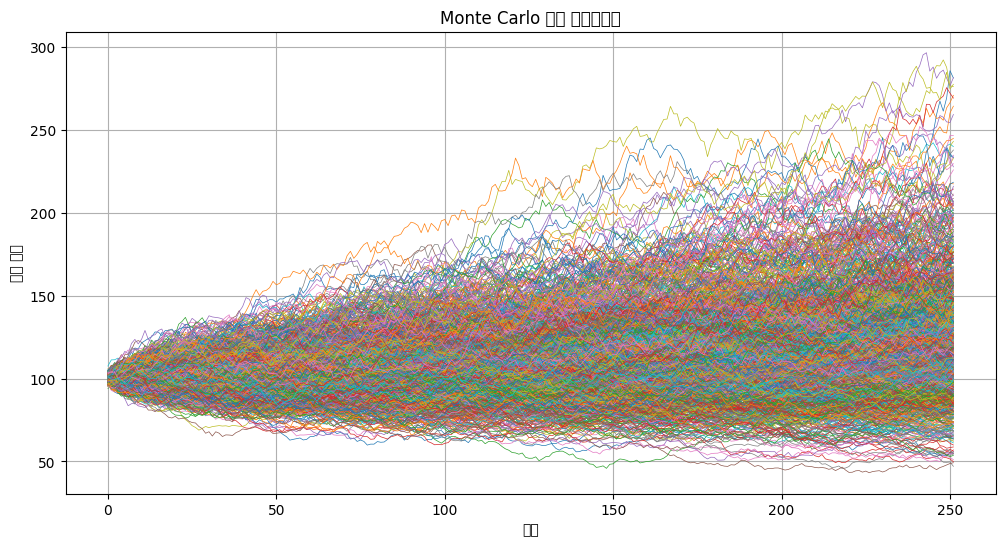

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 주식 가격 데이터 생성
np.random.seed(42)
num_days_per_year = 249
num_simulations = 1000

# 주식 가격의 로그 수익률을 정규분포로 "가정"
mean_return = 0.17  # 연간 평균 수익률
volatility = 0.3   # 연간 변동성

# 기초 주가 (예: 100달러)
initial_price = 100.0

# 주식 가격 데이터 생성
log_returns = np.random.normal((mean_return / num_days_per_year),
                               (volatility / np.sqrt(num_days_per_year)),
                               (num_days_per_year, num_simulations))

# 로그 수익률을 이용해 주식 가격 시뮬레이션
price_simulations = initial_price * np.exp(np.cumsum(log_returns, axis=0))

# 시뮬레이션 결과 데이터 프레임 생성
price_simulations_df = pd.DataFrame(price_simulations)

# 시뮬레이션 결과 시각화
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(price_simulations_df.index, price_simulations_df[i], lw=0.5)

plt.title('Monte Carlo 주식 시뮬레이션')
plt.xlabel('일자')
plt.ylabel('주식 가격')
plt.grid(True)
plt.show()


In [17]:
price_simulations_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,101.011241,99.806353,101.299852,102.989532,99.625654,99.625685,103.098940,101.529352,99.183588,101.098795,...,100.462332,96.279905,99.601137,98.786060,98.191136,99.537304,103.525491,101.286748,98.993137,101.156173
1,103.788143,101.634229,101.482509,101.806708,101.017068,100.437013,104.928721,102.824758,101.238776,100.148874,...,102.062337,97.728087,101.933081,100.184831,98.912172,101.639378,103.543444,99.679927,98.755140,99.809448
2,102.541405,101.425428,100.041564,101.284225,97.531767,100.910731,105.001922,101.317509,102.577131,102.007958,...,105.100342,98.913187,102.140825,99.851194,97.214253,101.857001,104.119256,97.433671,99.447851,99.584182
3,98.976961,99.856953,99.329632,105.033487,98.629520,98.462193,106.042343,98.464153,104.768228,101.171998,...,101.866953,98.102330,98.464285,101.346979,93.556501,101.980568,100.177598,96.911035,102.654083,100.332889
4,97.440624,99.865432,99.430511,106.047350,96.179286,99.638209,100.826870,97.364674,103.875976,102.459272,...,97.970663,99.444274,98.317195,102.507467,92.463777,101.954999,101.602037,102.852557,104.304027,98.804309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,195.122352,121.628108,121.146935,147.555428,145.380110,106.283837,197.119898,120.883153,119.920425,138.891587,...,155.302567,120.952662,138.483626,162.536257,214.668365,118.405851,116.037600,102.369399,132.545548,99.363470
248,190.648933,124.486780,123.375608,145.154476,145.935125,106.959540,198.445696,122.631764,119.358452,134.999740,...,154.926113,126.706856,137.640456,161.767614,217.456330,118.652583,114.039436,101.695112,134.339722,101.598336
249,190.307621,125.575362,128.794064,144.194592,146.566670,107.633628,196.386092,122.650115,118.892654,138.588497,...,158.042681,127.185728,145.906490,163.548462,211.302011,115.766177,117.318455,102.030118,130.849808,97.750663
250,192.442246,129.894539,127.786051,147.938278,141.260317,107.094906,199.259041,123.887683,116.889621,142.788011,...,160.622200,131.066732,146.967127,163.746503,210.338637,117.936448,119.352884,101.902047,139.493460,96.559271


In [12]:
df = pd.DataFrame()

# 일일 수익률
daily_returns = price_simulations_df.pct_change()

# 연간 주식 수익률 --> 가중치적용(??)
df['annual_returns'] = (1 + daily_returns.mean()) ** 252 - 1

# 연간 리스크
df['annual_risk'] = daily_returns.std() * np.sqrt(252)

In [16]:
# 무위험 이자율을 설정
rf = 0.0325

# 샤프 지수 계산
df['SharpeRatio'] = (df['annual_returns'] - rf) / df['annual_risk']

# 샤프 지수가 가장 높은 포트폴리오의 정보를 가져옵니다.
max_sharpe_portfolio = df[df['SharpeRatio'] == df['SharpeRatio'].max()]

# 샤프 지수, 연간 수익률, 연간 리스크를 출력합니다.
print("최적 포트폴리오의 샤프 지수:", max_sharpe_portfolio['SharpeRatio'].values[0])
print("최적 포트폴리오의 연간 수익률:", max_sharpe_portfolio['annual_returns'].values[0])
print("최적 포트폴리오의 연간 리스크:", max_sharpe_portfolio['annual_risk'].values[0])

최적 포트폴리오의 샤프 지수: 6.7567674014361145
최적 포트폴리오의 연간 수익률: 1.9298239814187976
최적 포트폴리오의 연간 리스크: 0.28080350686861466
